# Load dependencies

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error,r2_score
from scipy.stats import pearsonr
from script.ddG2ee import get_ddG2ee
import matplotlib.pyplot as plt

# Apply reported data to new reactions  directly

In [2]:
des=np.load('./data/des.npy')
ddg=np.load('./data/ddg.npy')
acid_index=np.load('./data/acid_index.npy')
sub_smi=np.load('./data/sub_smi.npy')
alk_smi=np.load('./data/alk_smi.npy')
acid_smi=np.load('./data/acid_smi.npy')

In [3]:
sel_index1=np.array([2,12,17,21,25,28,34,37,39,40,41,42,43,50,53,57,65,73,74,75,76,83,86,89,94,97,107])
des_sel1=des[:,sel_index1]
sel_index2=sel_index1
des_sel2=des[:,sel_index2]

from sklearn.model_selection import train_test_split
train_index=list(range(59))
test_index=list(range(59,69))

train_x,train_y = des_sel1[train_index],ddg[train_index]
test_x,test_y = des_sel1[test_index],ddg[test_index]
model = LinearSVR()

all_pred=[]
for i in range(10):
    model.fit(train_x,train_y)
    pred =model.predict(test_x)
    all_pred.append(pred)
all_pred=np.mean(np.array(all_pred),axis=0)

Text(0.8500000000000001, 1.4, 'MAE: 0.210')

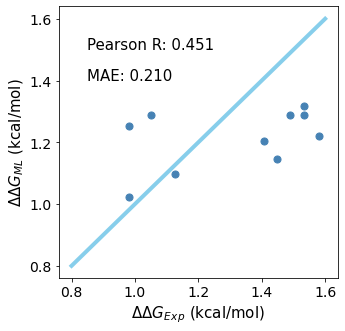

In [4]:
start_point=0.8
end_point=1.6
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(start_point, end_point+0.1, step=0.2),fontsize=14)
plt.yticks(np.arange(start_point, end_point+0.1, step=0.2),fontsize=14)
plt.xlabel('$\Delta$$\Delta$$G_E$$_x$$_p$ (kcal/mol)',fontsize=15)
plt.ylabel('$\Delta$$\Delta$$G_M$$_L$ (kcal/mol)',fontsize=15)
plt.plot([start_point,end_point],[start_point,end_point],c='skyblue',linewidth=4)#skyblue
plt.scatter(np.array(test_y),np.array(all_pred),c='steelblue',s=50, alpha=1)#steelblue
plt.text(start_point+0.05,1.5,'Pearson R: %.3f'%pearsonr(np.array(test_y),np.array(all_pred))[0],fontsize=15)
plt.text(start_point+0.05,1.4,'MAE: %.3f'%mean_absolute_error(np.array(test_y),np.array(all_pred)),fontsize=15)

# Apply reported data to new 10 reactions with delta learning

[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]


Text(0.9, 1.6, 'MAE: 0.095')

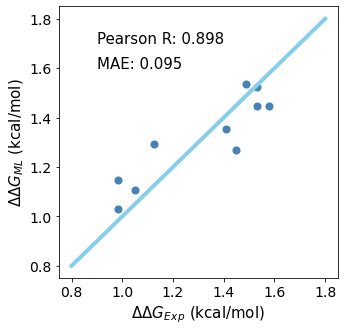

In [5]:
delta=test_y-all_pred

all_acid_add=[]
all_acid_test=[]
for i in range(10):
    all_acid_add.append(list(set(list(range(10)))-set([i])))
    all_acid_test.append(i)
    
pred_value=[]
exp_value=[]
for j in range(10):
    tem_add=list(np.array(acid_index)[all_acid_add[j]]) 
    tem_test=[np.array(acid_index)[all_acid_test[j]]]
    print(tem_test)
    tem_val_x,tem_test_x = des_sel2[tem_add],des_sel2[tem_test]
    tem_val_y,tem_test_y= delta[all_acid_add[j]],delta[all_acid_test[j]]

    model = LinearSVR()
    tem_delta_pred=[]
    for i in range(20):
        model.fit(tem_val_x,tem_val_y)
        pred =model.predict(tem_test_x)
        #val_pred_delta.append(model.predict(val_x))
        tem_delta_pred.append(pred)
    tem_delta_pred=np.mean(np.array(tem_delta_pred),axis=0)    
    pred_value+=list(tem_delta_pred)
    exp_value.append(tem_test_y)
pred=pred_value+all_pred
start_point=0.8
end_point=1.8
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(start_point, end_point+0.1, step=0.2),fontsize=14)
plt.yticks(np.arange(start_point, end_point+0.1, step=0.2),fontsize=14)
plt.xlabel('$\Delta$$\Delta$$G_E$$_x$$_p$ (kcal/mol)',fontsize=15)
plt.ylabel('$\Delta$$\Delta$$G_M$$_L$ (kcal/mol)',fontsize=15)
plt.plot([start_point,end_point],[start_point,end_point],c='skyblue',linewidth=4)

plt.scatter(np.array(test_y),np.array(pred),c='steelblue',s=50, alpha=1)
plt.text(start_point+0.1,1.7,'Pearson R: %.3f'%pearsonr(np.array(test_y),np.array(pred))[0],fontsize=15)
#plt.text(2,90,'$R^2$: %.3f'%(r2_score(np.array(train_y)*100,np.array(train_p)*100)),fontsize=15)
plt.text(start_point+0.1,1.6,'MAE: %.3f'%mean_absolute_error(np.array(test_y),np.array(pred)),fontsize=15)

# Apply reported data to 360 candidate acids with delta learning

In [6]:
all_num=69+360
train_index=list(set(list(range(59))))
val_index=list(set(list(range(59,69))))
test_index=list(set(list(range(69,all_num))))
model = LinearSVR()
train_x,val_x,test_x1,test_x2 = des_sel1[train_index],des_sel2[val_index],des_sel1[test_index],des_sel2[test_index]
train_y,val_y= ddg[train_index],ddg[val_index]

all_pred_test=[]
pred_test13=[]
for i in range(20):
    model.fit(train_x,train_y)
    pred_test=model.predict(test_x1)
    all_pred_test.append(pred_test)
    pred_test13.append(model.predict(val_x))
all_pred_test=np.mean(np.array(all_pred_test),axis=0)
pred_test13=np.mean(np.array(pred_test13),axis=0)
delta=val_y-pred_test13

model = LinearSVR()
all_delta_pred=[]
for i in range(20):
    model.fit(val_x,delta)
    pred =model.predict(test_x2)
    all_delta_pred.append(pred)
all_delta_pred=np.mean(np.array(all_delta_pred),axis=0)
y=all_delta_pred+all_pred_test

# Top-3

In [7]:
saa_cat=np.concatenate((np.array(sub_smi[69:all_num]).reshape(-1,1),
                        np.array(alk_smi[69:all_num]).reshape(-1,1),
                        np.array(acid_smi[69:all_num]).reshape(-1,1)),axis=1)
result_455=pd.DataFrame(saa_cat,columns=['sub','alk','acids'],dtype=str)
result_455['ddg']=y

t_ee=get_ddG2ee(np.array(result_455['ddg'].to_list()))
result_455['ee']=t_ee
acid=np.array(result_455['acids'].to_list())
ee_rank=sorted(t_ee,reverse=True)
index=[]
for tem_ee in ee_rank:
    for tem_index,j in enumerate(t_ee):
        if tem_ee==j:
            index.append(tem_index)
acid_rank=acid[index]

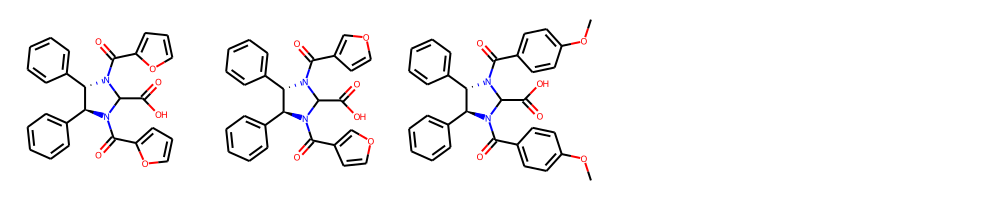

In [8]:
mol=[]
for i in acid_rank:
    mol.append(Chem.MolFromSmiles(i)) 
from rdkit.Chem import Draw#[50:92]
img = Draw.MolsToGridImage(mol[:3],molsPerRow=5,subImgSize=(200,200),legends=['' for x in mol])
img

In [9]:
result_455.to_csv('./data/360_acids_results.csv')